## WEEK 8, IN-MODULE ASSIGNMENT
- For both your in-module assignment this week, you'll be working with *radiative flux* data from NASA's CERES project!
<br><br>
- Since many of you work with, or are at least acquainted with, study of Earth's climate, this seems to be a particularly good dataset to have you explore

### What is the data?
- Monthly and climatological (long-term) means of various radiative fluxes; THIS SITE IS CURRENTLY DOWN WHICH IS SUPER ANNOYING BUT WOULD TYPICALLY CONTAIN MUCH MORE INFORMATION: https://asdc.larc.nasa.gov/project/CERES/CERES_EBAF-TOA_Edition4.0 

### How is the data collected?
- By instruments on satellites through the Clouds and the Earth's Radiant Energy System project (CERES)

### Why do we care about radiative fluxes?d
- the Earth's climate is controlled by how much solar radiation (from the Sun) is absorbed by the earth vs. how much longwave (infrared) radiation is emitted to space - *energy budget*

### What variables are we focusing on in this assignment?
- some of the variables we're interested in, specificially, are
  - **toa_sw_all_mon**: outgoing shortwave (solar) radiative flux (leaving the top of the atmosphere) 
  - **toa_lw_all_mon**: outgoing longwave radiative flux (leaving the top of the atmosphere)
  - **toa_net_all_mon**: net radiative flux at the top of the atmosphere 
  - **solar_mon**:  incoming shortwave (solar) radiative flux at the top of the atmosphere
- more details to follow when needed!

### Some more details on Earth's energy budget, if you're less familiar
- Can't see the below image?  Access: https://en.wikipedia.org/wiki/Earth%27s_energy_budget#/media/File:The-NASA-Earth's-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg 
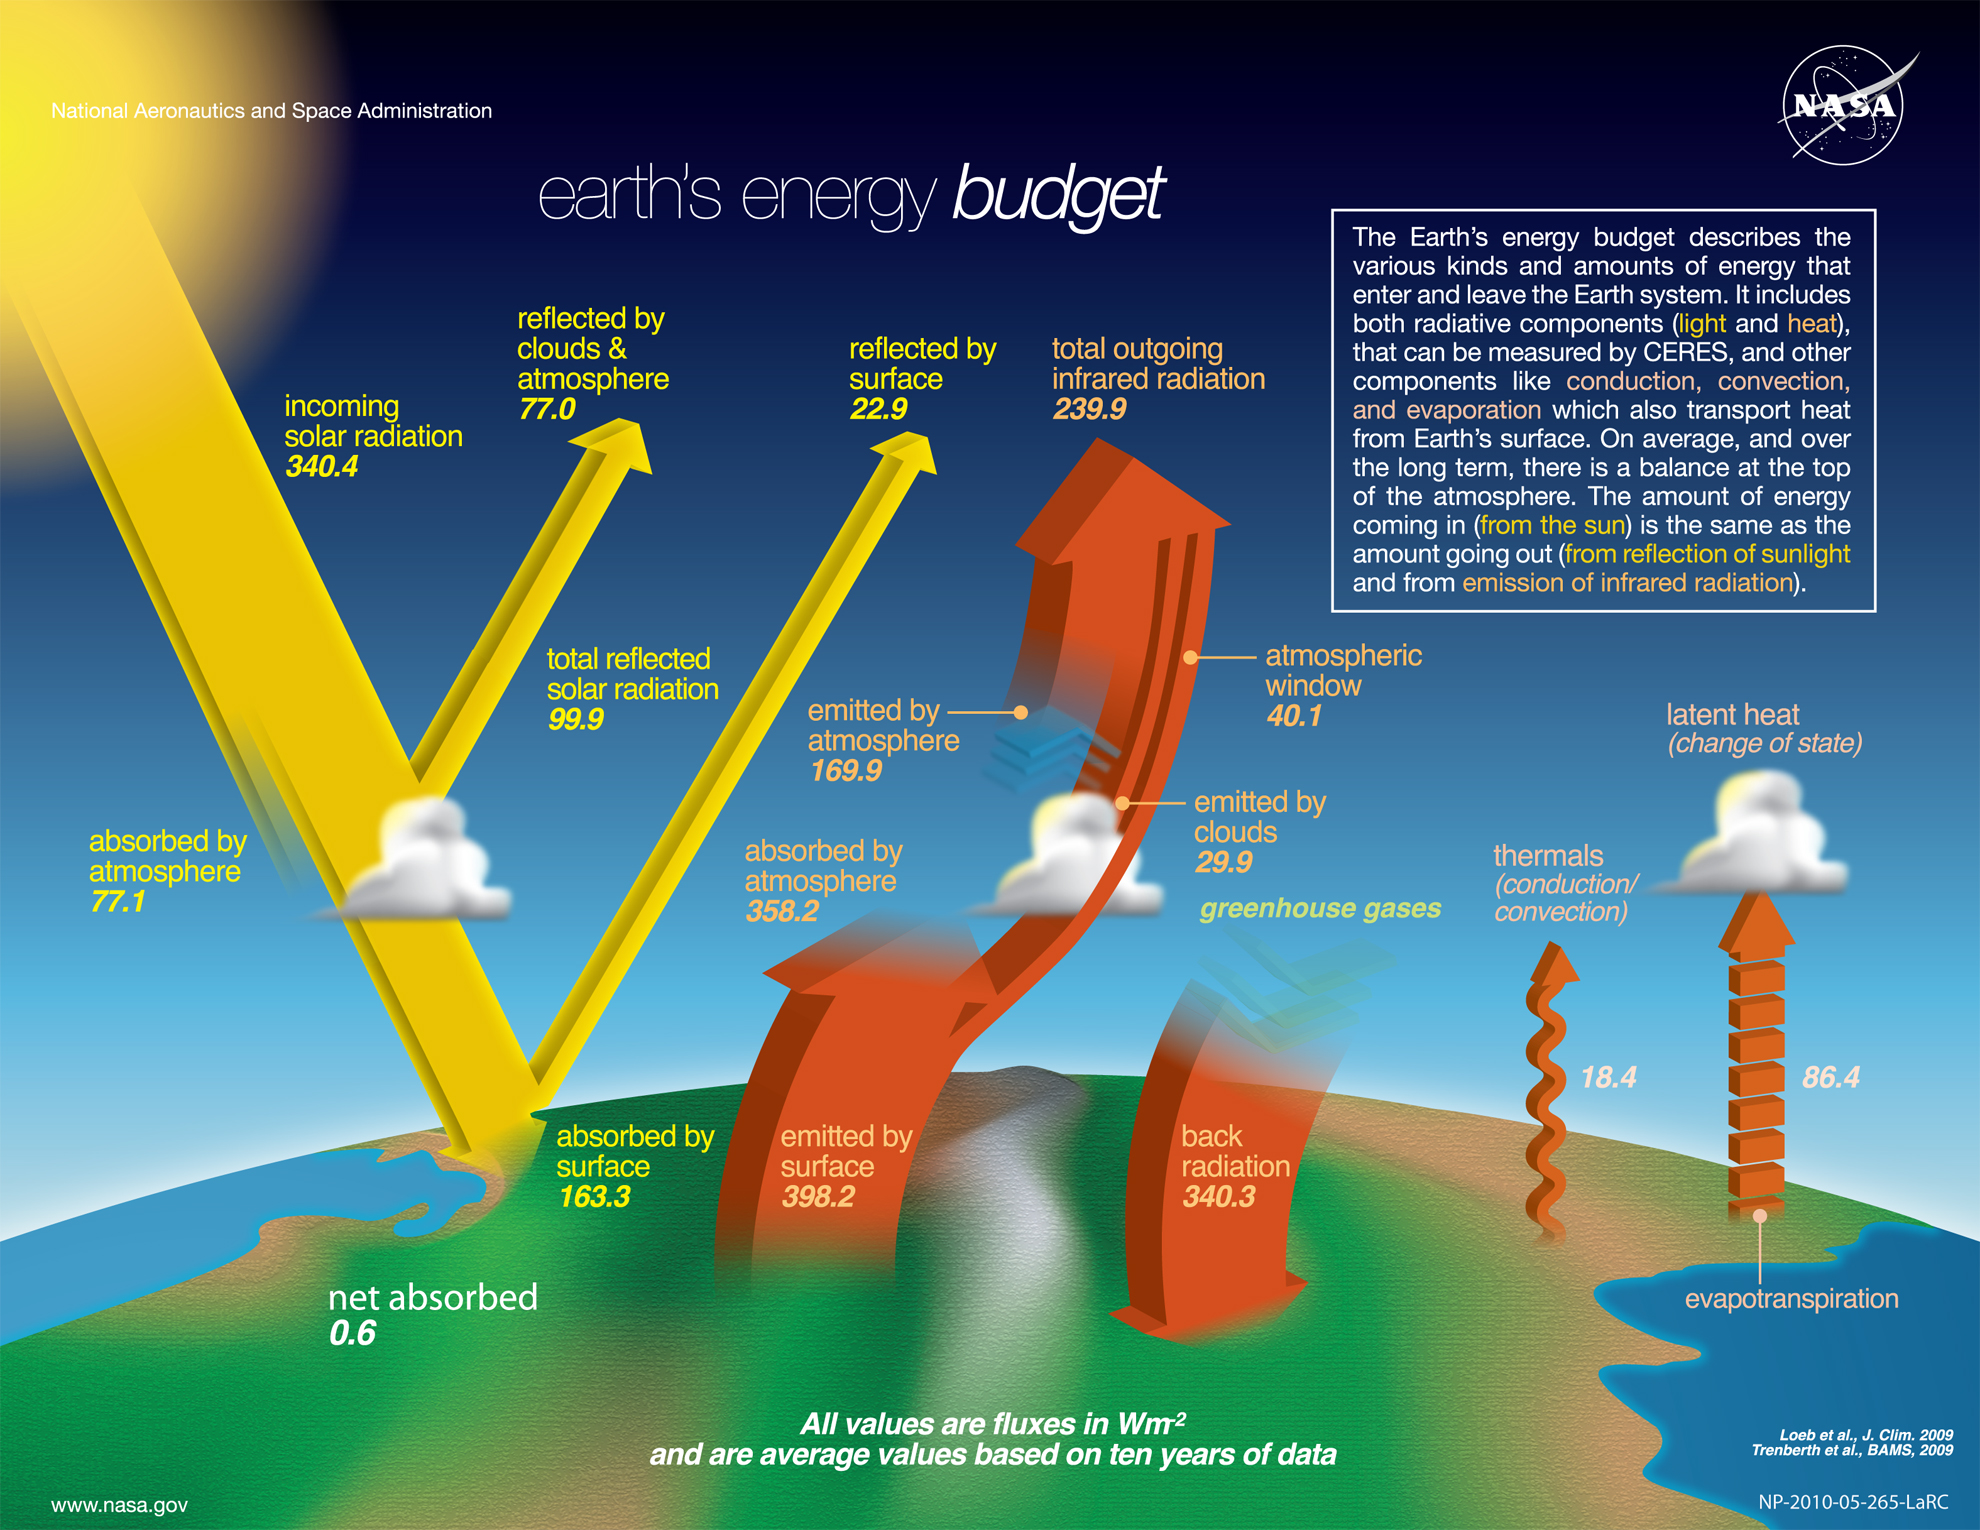


#### (1)  Import needed modules

In [2]:
# Do NOT forget to import Netcdf4 module
# Not doing so threw up an error for me when I tested this in Colab
# When trying to read in the radiation data

# Also, re: Cartopy and manually downloading map features - this appeared to be fixed, i.e., I did not need to do
# download map features from the Amazon cloud vs. letting Cartopy do it!
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread
import numpy as np
import xarray as xr
import netCDF4 as nc

#### (2)  This dataset is almost 1 GB in size, and the OPENDAP server at NASA for is down, so I created a subsetted file that is much more manageable for you to download - see this assignment on Moodle!

In [3]:
# CERES_EBAF-TOA_Edition4.0_200003-201810.nc
ds = xr.open_dataset('CERES_EBAF-TOA_Edition4.0_200003-201810.nc')
print(ds)

#- some of the variables we're interested in, specificially, are
#  - **toa_sw_all_mon**: outgoing shortwave (solar) radiative flux (leaving the top of the atmosphere) 
#  - **toa_lw_all_mon**: outgoing longwave radiative flux (leaving the top of the atmosphere)
#  - **toa_net_all_mon**: net radiative flux at the top of the atmosphere 
#  - **solar_mon**:  incoming shortwave (solar) radiative flux at the top of the atmosphere

<xarray.Dataset>
Dimensions:          (time: 224, lat: 180, lon: 360)
Coordinates:
  * lon              (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat              (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time             (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2018-10-15
Data variables:
    toa_sw_all_mon   (time, lat, lon) float32 ...
    toa_lw_all_mon   (time, lat, lon) float32 ...
    toa_net_all_mon  (time, lat, lon) float32 ...
    solar_mon        (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    version:           Edition 4.0; Release Date March 7, 2017
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B004.0
    Fill_Value:        Fill Value is -999.0
    Production_Files:  List 

#### (3)  Let's evaluate variables and coordinates - always a good first step
- (a.) What are the dimensions of these four variables we're focusing on - specifically, the named coordinates associated with them?  Please access this using a specific *attribute* of the dataset (rather than just print(dataset) and reading off coordinates from that)
<br><br>
- (b.) What is the *direction* of lat/lon coordinates?  This is key to know if we're SLICING at any point in our indexing, yes?
<br><br>
- (c.) What are the units of each of these four variables?
<br><br>
- (d.) What years does this dataset span?  What is the time interval between observations?

In [4]:
print(f'The dimensions are {ds.dims}')

The dimensions are Frozen({'time': 224, 'lat': 180, 'lon': 360})


In [5]:
print('Lat long coordinates form a grid with 0 longitude at the prime meridian to 360 at the prime meridan again. Longitude is measured from -90 to +90 at the North and South Poles respectively.')

Lat long coordinates form a grid with 0 longitude at the prime meridian to 360 at the prime meridan again. Longitude is measured from -90 to +90 at the North and South Poles respectively.


In [6]:
print('2000-03-15 to 2018-10-15 in one month intervals')

2000-03-15 to 2018-10-15 in one month intervals


#### (4)  Let's practice accessing elements!
*For the nearest gridpoint to Urbana-Champaign, access and plot each of the following:*
*You will use Urbana-Champaign data for this Q, Q5 + Q6!
<br>
- (a.)  Monthly time series of outgoing longwave radiative flux
<br><br>
- (b.)  Monthly time series of outgoing shortwave radiative flux
<br><br>
- (c.)  Monthly time series of incoming solar (shortwave) radiative flux

**NOTE**: you can use built-in plotting functionality in Xarray, or directly plot using Matplotlib. Don't fuss too much about changing labels unless you feel inspired to
<br><br>
**OPTIONAL CHALLENGE**: plot all three of these on the same, single, line plot, and include a legend

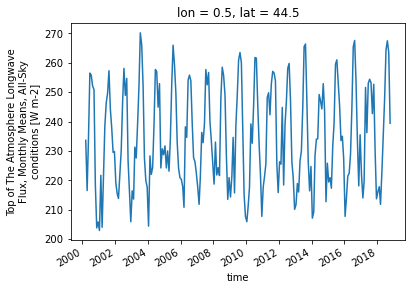

In [7]:
ds['toa_lw_all_mon'].sel(lat=44.2,lon=-88.2,method='nearest').plot()

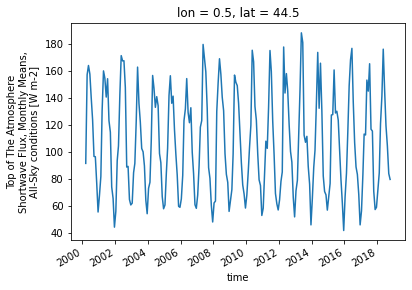

In [8]:
ds['toa_sw_all_mon'].sel(lat=44.2,lon=-88.2,method='nearest').plot()

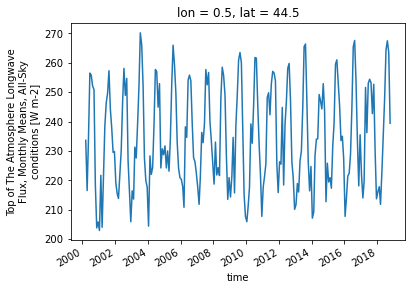

In [9]:
ds_illinois = ds['toa_lw_all_mon'].sel(lat=44.2,lon=-88.2,method='nearest')
ds_illinois.plot()

#### (5)  Generally speaking, describe a common pattern/trend that you see in these time series, in at least two sentences.

There is a general correlation between the incomming amount of solar radiation and the outgoing radiation. This trend also seems to follow the seasons as the energy of incoming solar radiation is lower in the winter due to effect of the 23.5 degree tilt of the Earth off the plane of the solar ecliptic.

#### (6) Let's practice finding max and minimum radiative fluxes and when they occur
- (a.) Access the data from Q4, but just for the year 2017, using sel
<br><br>
- (b.) Find the month in 2017 when the maximum occured, and when the minimum occured, for incoming shortwave radiative flux (this will generally be similar year to year)
<br><br>
- (c.) Then, find the actual values of the maximum and minimum incoming shortwave flux associated with the data at these times
<br><br>
- (d.) Do your answers to (b.) make sense?  (If you're not too familiar with the energy budget, you can skip answering this, or take a guess)

**OPTIONAL CHALLENGE**:  Plot the time series in Urbana-Champaign just for 2017, and indicate/annotate in a way of your choice when the maximum and minimum occur.

**HINTS**
- for (b.), no need to parse year/month using Python as you haven't learned how to do that yet - the full time strings will suffice!

In [10]:
ds2017 = ds_illinois.sel(time=slice('2017-01-15', '2017-12-15'))

In [11]:
max_label = ds2017.idxmax()
min_label = ds2017.idxmin()
print(f'Max Label: {max_label}\n\tMin Label: {min_label}')

Max Label: <xarray.DataArray 'time' ()>
array('2017-07-15T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    lon      float32 0.5
    lat      float32 44.5
	Min Label: <xarray.DataArray 'time' ()>
array('2017-12-15T00:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    lon      float32 0.5
    lat      float32 44.5


In [12]:
print(f'Max value on max date:\n{ds2017.loc[max_label]}\n')
print(f'Min value on max date:\n{ds2017.loc[min_label]}')

Max value on max date:
<xarray.DataArray 'toa_lw_all_mon' ()>
array(254.4, dtype=float32)
Coordinates:
    lon      float32 0.5
    lat      float32 44.5
    time     datetime64[ns] 2017-07-15
Attributes:
    long_name:      Top of The Atmosphere Longwave Flux, Monthly Means, All-S...
    standard_name:  TOA Longwave Flux - All-Sky
    CF_name:        toa_outgoing_longwave_flux
    units:          W m-2
    valid_min:            0.00000
    valid_max:            400.000

Min value on max date:
<xarray.DataArray 'toa_lw_all_mon' ()>
array(213.7, dtype=float32)
Coordinates:
    lon      float32 0.5
    lat      float32 44.5
    time     datetime64[ns] 2017-12-15
Attributes:
    long_name:      Top of The Atmosphere Longwave Flux, Monthly Means, All-S...
    standard_name:  TOA Longwave Flux - All-Sky
    CF_name:        toa_outgoing_longwave_flux
    units:          W m-2
    valid_min:            0.00000
    valid_max:            400.000


In [13]:
print(f'The maximum and minimum values of solar_mon almost align with the summer and winter solstice, lending great support to the earlier observation that seasonality affects incoming solar radiation.')

The maximum and minimum values of solar_mon almost align with the summer and winter solstice, lending great support to the earlier observation that seasonality affects incoming solar radiation.


#### (7) Time for additional practice with accessing elements and taking means!
Now, let's look at radiative fluxes over ~ the state of Illinois (very roughly -92W to -87W, 37N to 43N).  Again, you can use built-in Xarray plotting or directly through Matplotlib
<br>
- (a.) Access and plot outgoing longwave radiation over the state of Illinois for July 2017 using sel - *you are no longer just using CU data!*
  - **Optional challenge**: on a map, that includes state lines 
<br><br>
- (b.) Take the average of outgoing longwave radiation over the state of Illinois over time only (not spatial average) and plot
  - **Optional challenge**: on a map, that includes state lines 
<br><br>
- (c.) As you'll see on your homework, averaging these radiation data spatially, without taking into account some additional considerations, isn't quite right.  But you're going to do it anyway!  Average outgoing longwave radiation over the state of Illinois (but do not average over time, just the spatial dimensions), and plot the resulting time series.

**HINTS**

*Hint 1*: You can average over more than one dimension via the dim argument in mean (or you can take the mean of a mean) - dim=['firstdim','seconddim'], etc.

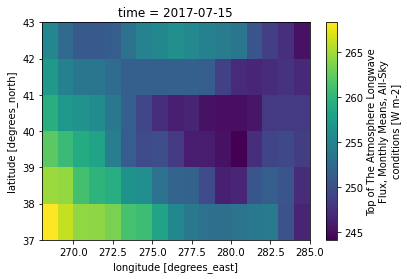

In [14]:
min_lon = 268
max_lon = 285
min_lat = 37
max_lat = 43
mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)
ds_state = ds.where(mask_lon & mask_lat, drop=True)
ds_state['toa_lw_all_mon'].sel(time=slice('2017-07-01', '2017-07-31')).plot()

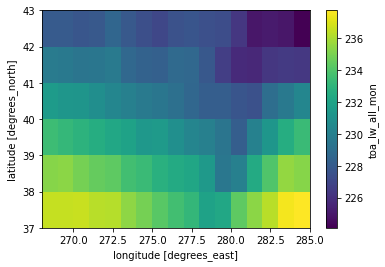

In [16]:
ds_state['toa_lw_all_mon'].mean(dim='time').plot()